## CV GROUP TASK - Hough Transform

**Group members:**
- Ahmed Hesham AbdElEllah Mohamed AboAli
- Hussien Mohamed Saad ElRashidy
- AbdElRahman Muhsen AbdElLatif AbdElGhany
- Mariam Magued Habib Bebawy
- Youssef Ahmed MahmoudElSayed Shawki

first trying hough with cv.HoughCircles in OpenCV


it uses Hough Gradient Method which uses the gradient information of edges instead of using 3D accumlator and voting in it

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def load_image(name):
    grey_img = cv2.imread(name,0)
    togrey_img = cv2.imread(name)
    color_img = cv2.cvtColor(grey_img, cv2.COLOR_GRAY2BGR)
    gimg = cv2.cvtColor(togrey_img, cv2.COLOR_BGR2GRAY)
    return gimg , color_img

first we will smooth the image to avoid detecting false circles using Gaussian filter

In [2]:
def blur_image(img, ksize):
    blurred_image = cv2.GaussianBlur(img, (ksize,ksize), cv2.BORDER_DEFAULT)
    return blurred_image 

In [3]:

#circles arrays is (centerx, centery, radius)
def circle_func(image, min_dist, p1, p2):
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1.1, min_dist,
                            param1=p1, param2=p2, minRadius=0, maxRadius=0)
    circles = np.uint16(np.around(circles))
    return circles
# HOUGH_GRADIENT : is the only method for detection 
# dp :   inverse ratio between accumlator reolution to image resolution when dp = 1 accumlator resolution = image resolution
# when dp = 2 accumlator resolution = 0.5 image resolution, 0.5 width and height
# min_dist : minimum distance between centres of circles
# p1 - parameter 1 : higher threshold of the two passed to the canny edge detector 
# p2 - parameter 2 : accumlator threshold for the circles centres of detection stage

the first step of hough gradient used in cv2.HoughCircles is to find the center of the circle according to the modulus vector of each point, so that the three-dimensional accumulation plane is transformed into a two-dimensional accumulation plane; the second step is to support it based on the edge non-zero pixels of all candidate centers Degree to determine the radius.

In [5]:
def plot_circles(circled , circles):
    for (x,y,r) in circles[0,:]:
        cv2.circle(circled, (x,y), r, (255,0,0), 2)
        cv2.circle(circled, (x,y), 2, (0,255,255), 3)
        plt.imshow(circled)
    return circled

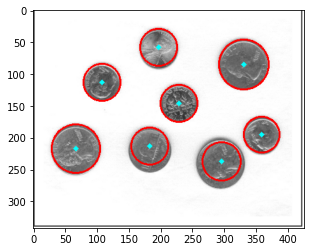

In [6]:
grey_img, color_img = load_image("Circles.png")
blur_img = blur_image(grey_img, 3)
circles = circle_func(blur_img, 20, 50, 70)
img_circ = plot_circles(color_img, circles)
#parameters for circles are 20 50 70

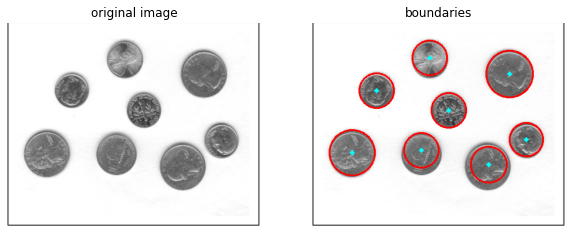

In [7]:
# PLOTTING ORIGINAL // BOUNDARIES
fig = plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(grey_img, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.subplot(122), plt.imshow(img_circ, cmap='gray'), plt.axis('off'), plt.title('boundaries')
plt.show()

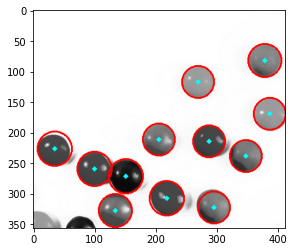

In [8]:
grey_img , color_img = load_image("smarties.png")
blur_img = blur_image(grey_img , 3)
circles = circle_func(blur_img , 20 , 50 ,60)
img_circ = plot_circles(color_img , circles)

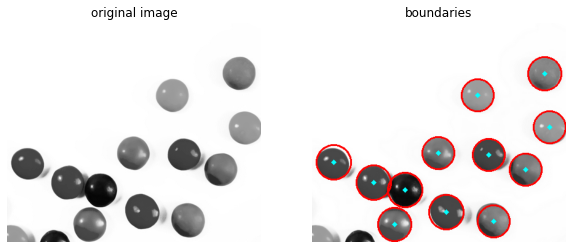

In [9]:
# PLOTTING ORIGINAL // BOUNDARIES
fig = plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(grey_img, cmap='gray'), plt.axis('off'), plt.title('original image')
plt.subplot(122), plt.imshow(img_circ, cmap='gray'), plt.axis('off'), plt.title('boundaries')
plt.show()